In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
# Loading the dataset
folder_path = "ddf--gapminder--systema_globalis//"
gdp_capita = pd.read_csv(folder_path + 
                         "ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv")
# Renaming the columns
gdp_capita = gdp_capita.rename(columns={"income_per_person_gdppercapita_ppp_inflation_adjusted": "income", "time": "year"})

life_exp = pd.read_csv(folder_path + 'ddf--datapoints--life_expectancy_years--by--geo--time.csv')

# Renaming the columns
life_exp = life_exp.rename(columns={"life_expectancy_years": "life_exp", "time": "year"})

child_mor = pd.read_csv(folder_path + 'ddf--datapoints--child_mortality_0_5_year_olds_more_years_version_7--by--geo--time.csv')
# Renaming the columns
child_mor = child_mor.rename(columns={"child_mortality_0_5_year_olds_more_years_version_7": "child_mortality", "time": "year"})

In [3]:
df = gdp_capita.merge(life_exp, on=['geo', 'year']).merge(child_mor, on=['geo', 'year'])

In [4]:
df.head()

geo  year  income  life_exp  child_mortality
0  afg  1800     603     28.21            468.6
1  afg  1801     603     28.20            468.6
2  afg  1802     603     28.19            468.6
3  afg  1803     603     28.18            468.6
4  afg  1804     603     28.17            468.6

In [5]:
gdp_capita.head()

geo  year  income
0  afg  1800     603
1  afg  1801     603
2  afg  1802     603
3  afg  1803     603
4  afg  1804     603

In [6]:
# life_exp.head()

In [7]:
# child_mor.head()

In [8]:
# df.groupby(['year'])['income', 'life_exp', 'child_mortality', 'year'].mean().reset_index()

### Problem 4
##### Choose and fit one or more models to quantify the relationship betweem income (GDP per capita) and life expectancy over time. Justify your choice of model and comment on its appropriateness. (You are not required to handle the autocorrelation of time series, but should comment on how this impacts your analysis.) Visualize the model(s) and comment on what they tell you about the relationship between income and life expectancy over time.


In [9]:
df.head()

geo  year  income  life_exp  child_mortality
0  afg  1800     603     28.21            468.6
1  afg  1801     603     28.20            468.6
2  afg  1802     603     28.19            468.6
3  afg  1803     603     28.18            468.6
4  afg  1804     603     28.17            468.6

In [10]:
import plotly.express as px
fig = px.scatter(x=df['income'], y=df['life_exp'], opacity=0.7)
fig.update_layout(title_text="Relationship between income and life expectancy")

fig.update_xaxes(title_text="<b>Income</b>")

fig.update_yaxes(title_text="<b>Life expectancy</b>")

fig.show()


It looks like there is a linear relatonship between Income and log of life expectancy

Coefficients: 
 [0.00089777]
Mean squared error: 178.85
Variance score: 0.32


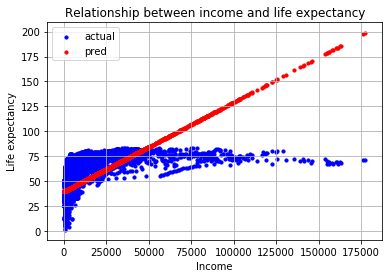

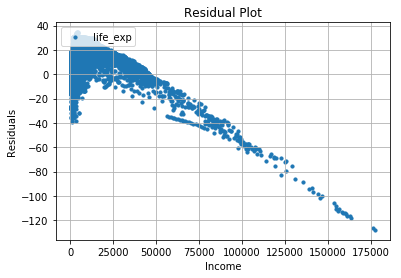

In [11]:
# Model
lr = LinearRegression()
length = len(df)
x = df['income'].values.reshape(length, 1) 
y = df['life_exp']
lr.fit(x, y)

y_pred = lr.predict(x)

residuals = y - y_pred

# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, y_pred))


fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(df['income'], y, s=10, c='b', label='actual')
ax1.scatter(df['income'],y_pred, s=10, c='r',label='pred')
ax1.set_title('Relationship between income and life expectancy')
ax1.set_xlabel('Income')
ax1.set_ylabel('Life expectancy')
ax1.grid(True)
plt.legend(loc='upper left');
plt.show()


fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(df['income'], residuals, s=10)
# ax1.scatter(df['income'],y_pred, s=10, c='r',label='pred')
ax1.set_title('Residual Plot')
ax1.set_xlabel('Income')
ax1.set_ylabel('Residuals')
ax1.grid(True)
plt.legend(loc='upper left');
plt.show()

Coefficients: 
 [11.77565323]
Mean squared error: 87.64
Variance score: 0.67


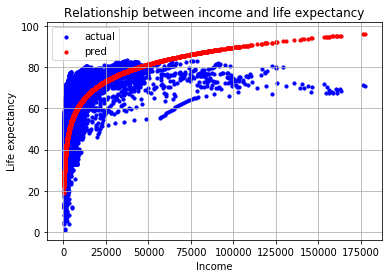

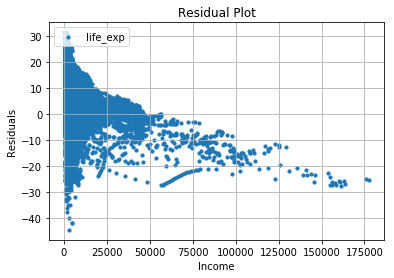

In [12]:
# Model
lr = LinearRegression()
length = len(df)
x = np.log(df['income'].values).reshape(length, 1) 
y = df['life_exp']
lr.fit(x, y)

y_pred = lr.predict(x)

residuals = y - y_pred

# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, y_pred))
fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(df['income'], y, s=10, c='b', label='actual')
ax1.scatter(df['income'],y_pred, s=10, c='r',label='pred')
ax1.set_title('Relationship between income and life expectancy')
ax1.set_xlabel('Income')
ax1.set_ylabel('Life expectancy')
ax1.grid(True)
plt.legend(loc='upper left');
plt.show()


fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(df['income'], residuals, s=10)
ax1.set_title('Residual Plot')
ax1.set_xlabel('Income')
ax1.set_ylabel('Residuals')
ax1.grid(True)
plt.legend(loc='upper left');
plt.show()

Coefficients: 
 [-0.00828366]
Mean squared error: 19971.17
Variance score: 0.27


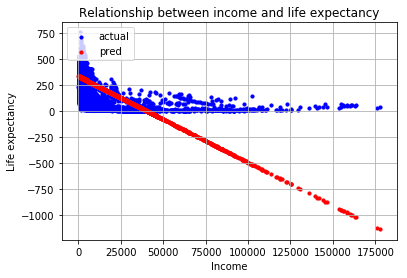

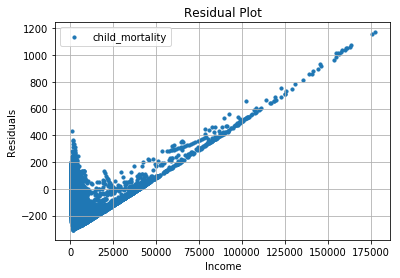

In [13]:
# Model
lr = LinearRegression()
length = len(df)
x = df['income'].values.reshape(length, 1) 
y = df['child_mortality']
lr.fit(x, y)

y_pred = lr.predict(x)

residuals = y - y_pred

# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, y_pred))


fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(df['income'], y, s=10, c='b', label='actual')
ax1.scatter(df['income'],y_pred, s=10, c='r',label='pred')
ax1.set_title('Relationship between income and life expectancy')
ax1.set_xlabel('Income')
ax1.set_ylabel('Life expectancy')
ax1.grid(True)
plt.legend(loc='upper left');
plt.show()


fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(df['income'], residuals, s=10)
# ax1.scatter(df['income'],y_pred, s=10, c='r',label='pred')
ax1.set_title('Residual Plot')
ax1.set_xlabel('Income')
ax1.set_ylabel('Residuals')
ax1.grid(True)
plt.legend(loc='upper left');
plt.show()

Coefficients: 
 [-116.60730742]
Mean squared error: 9916.22
Variance score: 0.64


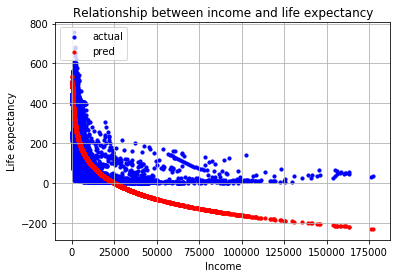

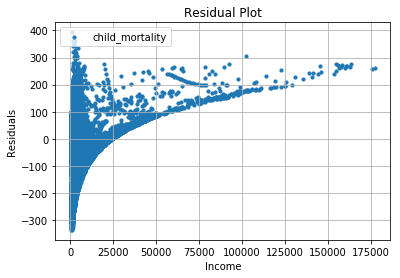

In [14]:
# Model
lr = LinearRegression()
length = len(df)
x = np.log(df['income'].values).reshape(length, 1) 
y = df['child_mortality']
lr.fit(x, y)

y_pred = lr.predict(x)

residuals = y - y_pred

# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, y_pred))
fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(df['income'], y, s=10, c='b', label='actual')
ax1.scatter(df['income'],y_pred, s=10, c='r',label='pred')
ax1.set_title('Relationship between income and life expectancy')
ax1.set_xlabel('Income')
ax1.set_ylabel('Life expectancy')
ax1.grid(True)
plt.legend(loc='upper left');
plt.show()


fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(df['income'], residuals, s=10)
ax1.set_title('Residual Plot')
ax1.set_xlabel('Income')
ax1.set_ylabel('Residuals')
ax1.grid(True)
plt.legend(loc='upper left');
plt.show()

Coefficients: 
 [-2.76984985]
Mean squared error: 13581.13
Variance score: 0.50


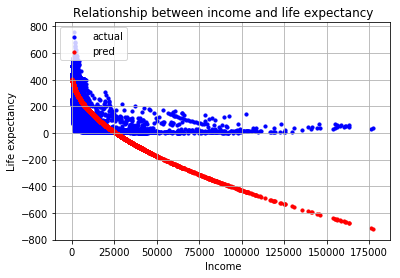

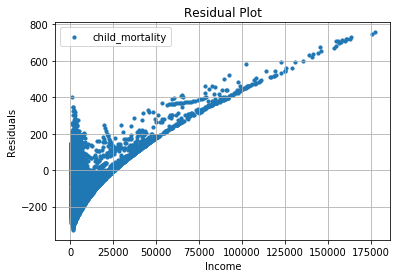

In [15]:
# Model
lr = LinearRegression()
length = len(df)
x = np.sqrt(df['income'].values).reshape(length, 1) 
y = df['child_mortality']
lr.fit(x, y)

y_pred = lr.predict(x)

residuals = y - y_pred

# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, y_pred))
fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(df['income'], y, s=10, c='b', label='actual')
ax1.scatter(df['income'],y_pred, s=10, c='r',label='pred')
ax1.set_title('Relationship between income and life expectancy')
ax1.set_xlabel('Income')
ax1.set_ylabel('Life expectancy')
ax1.grid(True)
plt.legend(loc='upper left');
plt.show()


fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(df['income'], residuals, s=10)
ax1.set_title('Residual Plot')
ax1.set_xlabel('Income')
ax1.set_ylabel('Residuals')
ax1.grid(True)
plt.legend(loc='upper left');
plt.show()

Coefficients: 
 [181294.19021891]
Mean squared error: 15007.81
Variance score: 0.45


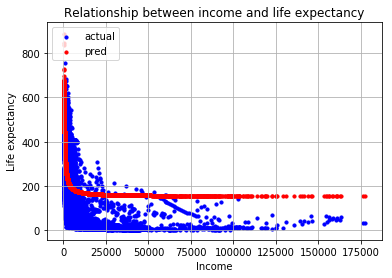

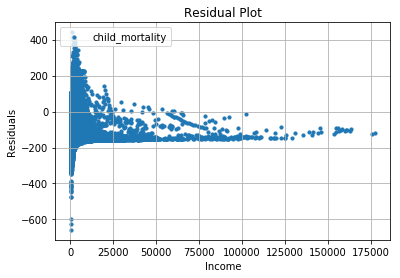

In [16]:
# Model
lr = LinearRegression()
length = len(df)
x = (1/df['income'].values).reshape(length, 1) 
y = df['child_mortality']
lr.fit(x, y)

y_pred = lr.predict(x)

residuals = y - y_pred

# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, y_pred))
fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(df['income'], y, s=10, c='b', label='actual')
ax1.scatter(df['income'],y_pred, s=10, c='r',label='pred')
ax1.set_title('Relationship between income and life expectancy')
ax1.set_xlabel('Income')
ax1.set_ylabel('Life expectancy')
ax1.grid(True)
plt.legend(loc='upper left');
plt.show()


fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(df['income'], residuals, s=10)
ax1.set_title('Residual Plot')
ax1.set_xlabel('Income')
ax1.set_ylabel('Residuals')
ax1.grid(True)
plt.legend(loc='upper left');
plt.show()

Coefficients: 
 [7221.80111895]
Mean squared error: 10241.22
Variance score: 0.62


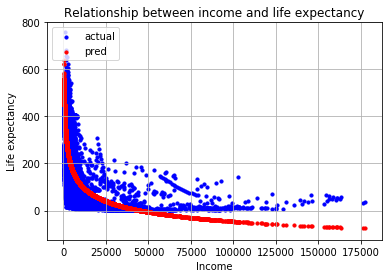

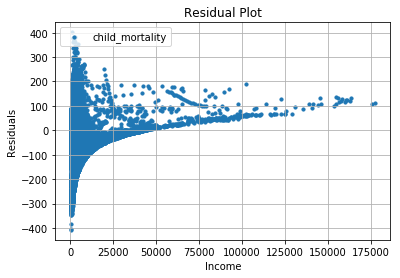

In [17]:
# Model
lr = LinearRegression()
length = len(df)
x = (1/np.log(df['income'].values)).reshape(length, 1) 
y = df['child_mortality']
lr.fit(x, y)

y_pred = lr.predict(x)

residuals = y - y_pred

# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, y_pred))
fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(df['income'], y, s=10, c='b', label='actual')
ax1.scatter(df['income'],y_pred, s=10, c='r',label='pred')
ax1.set_title('Relationship between income and life expectancy')
ax1.set_xlabel('Income')
ax1.set_ylabel('Life expectancy')
ax1.grid(True)
plt.legend(loc='upper left');
plt.show()


fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(df['income'], residuals, s=10)
ax1.set_title('Residual Plot')
ax1.set_xlabel('Income')
ax1.set_ylabel('Residuals')
ax1.grid(True)
plt.legend(loc='upper left');
plt.show()

Coefficients: 
 [11020.823403]
Mean squared error: 11403.62
Variance score: 0.58


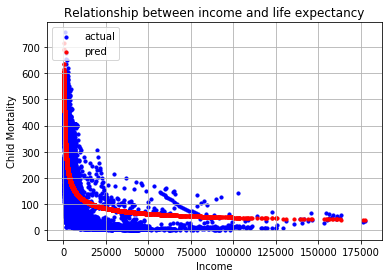

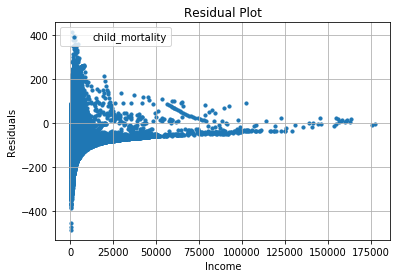

In [22]:
# Model
lr = LinearRegression()
length = len(df)
x = (1/(np.power(df['income'].values, 0.5))).reshape(length, 1) 
y = df['child_mortality']
lr.fit(x, y)

y_pred = lr.predict(x)

residuals = y - y_pred

# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, y_pred))
fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(df['income'], y, s=10, c='b', label='actual')
ax1.scatter(df['income'],y_pred, s=10, c='r',label='pred')
ax1.set_title('Relationship between income and life expectancy')
ax1.set_xlabel('Income')
ax1.set_ylabel('Child Mortality')
ax1.grid(True)
plt.legend(loc='upper left');
plt.show()


fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(df['income'], residuals, s=10)
ax1.set_title('Residual Plot')
ax1.set_xlabel('Income')
ax1.set_ylabel('Residuals')
ax1.grid(True)
plt.legend(loc='upper left');
plt.show()